In [2]:
import pandas as pd
import numpy as np
import requests
import json, io, time, urllib3, re
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interact
urllib3.disable_warnings()

### Request data from data.go API

In [3]:
response = requests.get(f"https://dataapi.oncb.go.th/suppress/case_per/2565", verify = False)
pd.DataFrame(response.json()["data"])

,budgetYear,REG_ONCB,REG_NAME,PROV_ID,PROV_NAME,arrestAll_case,arrestAll_per,arrestTreat_case,arrestTreat_per,arrestOccupy_case,...,arrestProduct_case,arrestProduct_per,arrestImport_case,arrestImport_per,arrestExport_case,arrestExport_per,arrestJoincase_cas,arrestJoincase_per,arrest5Main_case,arrest5Main_per
0,2565,08,ปปส.ภาค 8,81,กระบี่,2472,2590,168,170,1044,...,23,23,0,0,0,0,0,0,236,275
1,2565,10,กรุงเทพมหานคร,10,กรุงเทพมหานคร,7338,7593,2755,2787,2386,...,37,55,1,1,0,0,0,0,942,1056
2,2565,07,ปปส.ภาค 7,71,กาญจนบุรี,3277,3340,1476,1495,827,...,157,158,0,0,0,0,0,0,504,540
3,2565,04,ปปส.ภาค 4,46,กาฬสินธุ์,5807,5890,3753,3800,2098,...,61,61,0,0,1,1,0,0,568,597
4,2565,06,ปปส.ภาค 6,62,กำแพงเพชร,1793,1893,623,646,448,...,37,37,0,0,0,0,0,0,413,483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2565,03,ปปส.ภาค 3,37,อำนาจเจริญ,2445,2511,1426,1451,344,...,52,52,1,1,0,0,0,0,378,419
73,2565,04,ปปส.ภาค 4,41,อุดรธานี,6895,6994,4430,4486,2256,...,140,140,2,2,0,0,0,0,823,862
74,2565,06,ปปส.ภาค 6,53,อุตรดิตถ์,2094,2276,1217,1272,619,...,89,90,0,0,0,0,0,0,353,413
75,2565,06,ปปส.ภาค 6,61,อุทัยธานี,796,816,430,438,273,...,25,25,0,0,0,0,0,0,110,121


In [4]:
def get_data(year):
    response = requests.get(f"https://dataapi.oncb.go.th/suppress/case_per/{year}", verify = False)
    if response.ok:
        return pd.DataFrame(response.json()["data"])
    return None

In [5]:
df = get_data(2557)
for year in range(2558, 2566):
    df_append = get_data(year)
    df = pd.concat([df, df_append]).copy()
    time.sleep(.5)

df = df.reset_index(drop=True).copy()
df

,budgetYear,REG_ONCB,REG_NAME,PROV_ID,PROV_NAME,arrestAll_case,arrestAll_per,arrestTreat_case,arrestTreat_per,arrestOccupy_case,...,arrestProduct_case,arrestProduct_per,arrestImport_case,arrestImport_per,arrestExport_case,arrestExport_per,arrestJoincase_cas,arrestJoincase_per,arrest5Main_case,arrest5Main_per
0,2557,04,ปปส.ภาค 4,46,กาฬสินธุ์,4119,4341,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1073,1256
1,2557,04,ปปส.ภาค 4,40,ขอนแก่น,7408,7630,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1247,1431
2,2557,04,ปปส.ภาค 4,48,นครพนม,4511,4637,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,397,503
3,2557,04,ปปส.ภาค 4,38,บึงกาฬ,2605,2678,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,284,347
4,2557,04,ปปส.ภาค 4,44,มหาสารคาม,2709,2773,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,624,684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,2565,03,ปปส.ภาค 3,37,อำนาจเจริญ,2445,2511,1426,1451,344,...,52,52,1.0,1.0,0.0,0.0,0.0,0.0,378,419
689,2565,04,ปปส.ภาค 4,41,อุดรธานี,6895,6994,4430,4486,2256,...,140,140,2.0,2.0,0.0,0.0,0.0,0.0,823,862
690,2565,06,ปปส.ภาค 6,53,อุตรดิตถ์,2094,2276,1217,1272,619,...,89,90,0.0,0.0,0.0,0.0,0.0,0.0,353,413
691,2565,06,ปปส.ภาค 6,61,อุทัยธานี,796,816,430,438,273,...,25,25,0.0,0.0,0.0,0.0,0.0,0.0,110,121


### Try Graph

In [6]:
tmp = df.groupby(by = "budgetYear").sum()[["arrestAll_case"]].copy()
tmp

,arrestAll_case
budgetYear,
2557,346666
2558,264591
2559,0
2560,260634
2561,331502
2562,363359
2563,323903
2564,336582
2565,258190


In [7]:
tmp["arrestAll_case"] = tmp["arrestAll_case"].apply(lambda x: tmp["arrestAll_case"].mean() if x == 0 else x).copy()
tmp

,arrestAll_case
budgetYear,
2557,346666.000000
2558,264591.000000
2559,276158.555556
2560,260634.000000
2561,331502.000000
2562,363359.000000
2563,323903.000000
2564,336582.000000
2565,258190.000000


<Axes: xlabel='budgetYear'>

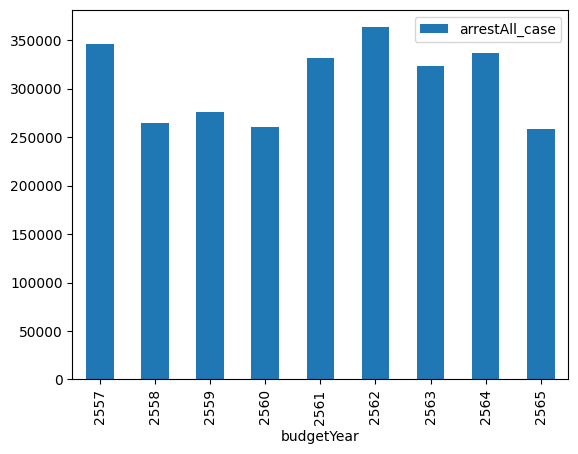

In [8]:
tmp.plot(kind = "bar")

### Interactive Graph

In [28]:
import seaborn as sns
tmp = df.copy()
tmp.head()

,budgetYear,REG_ONCB,REG_NAME,PROV_ID,PROV_NAME,arrestAll_case,arrestAll_per,arrestTreat_case,arrestTreat_per,arrestOccupy_case,...,arrestProduct_case,arrestProduct_per,arrestImport_case,arrestImport_per,arrestExport_case,arrestExport_per,arrestJoincase_cas,arrestJoincase_per,arrest5Main_case,arrest5Main_per
0,2557,04,ปปส.ภาค 4,46,กาฬสินธุ์,4119,4341,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1073,1256
1,2557,04,ปปส.ภาค 4,40,ขอนแก่น,7408,7630,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1247,1431
2,2557,04,ปปส.ภาค 4,48,นครพนม,4511,4637,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,397,503
3,2557,04,ปปส.ภาค 4,38,บึงกาฬ,2605,2678,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,284,347
4,2557,04,ปปส.ภาค 4,44,มหาสารคาม,2709,2773,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,624,684


In [29]:
url = "https://www.enghero.com/article/%E0%B8%88%E0%B8%B1%E0%B8%87%E0%B8%AB%E0%B8%A7%E0%B8%B1%E0%B8%94%E0%B9%83%E0%B8%99%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%80%E0%B8%97%E0%B8%A8%E0%B9%84%E0%B8%97%E0%B8%A2-%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B8%AD%E0%B8%B1%E0%B8%87%E0%B8%81%E0%B8%A4%E0%B8%A9"
headers = { "User-Agent": "Mozilla" }
response = requests.get(url, headers = headers)
dfs = pd.read_html(io.StringIO(response.text))

df_prov = dfs[0].drop("#", axis = 1).copy()
df_prov.columns = ["PROV_NAME", "prov_en"]
df_prov["prov_en"] = df_prov["prov_en"].str.replace(" Province", "").apply(lambda x: re.findall(r'\((.*?)\)', x)[0] if re.findall(r'\((.*?)\)', x) else x).copy()
df_prov["PROV_NAME"] = df_prov["PROV_NAME"].str.replace("จังหวัด", "")
df_prov.head()

,PROV_NAME,prov_en
0,กรุงเทพมหานคร,Bangkok
1,กระบี่,Krabi
2,กาญจนบุรี,Kanchanaburi
3,กาฬสินธุ์,Kalasin
4,กำแพงเพชร,Kamphaeng Phet


In [30]:
tmp = pd.merge(tmp, df_prov, on='PROV_NAME', how='left').copy()
tmp.head().to_json()

'{"budgetYear":{"0":"2557","1":"2557","2":"2557","3":"2557","4":"2557"},"REG_ONCB":{"0":"04","1":"04","2":"04","3":"04","4":"04"},"REG_NAME":{"0":"\\u0e1b\\u0e1b\\u0e2a.\\u0e20\\u0e32\\u0e04 4","1":"\\u0e1b\\u0e1b\\u0e2a.\\u0e20\\u0e32\\u0e04 4","2":"\\u0e1b\\u0e1b\\u0e2a.\\u0e20\\u0e32\\u0e04 4","3":"\\u0e1b\\u0e1b\\u0e2a.\\u0e20\\u0e32\\u0e04 4","4":"\\u0e1b\\u0e1b\\u0e2a.\\u0e20\\u0e32\\u0e04 4"},"PROV_ID":{"0":"46","1":"40","2":"48","3":"38","4":"44"},"PROV_NAME":{"0":"\\u0e01\\u0e32\\u0e2c\\u0e2a\\u0e34\\u0e19\\u0e18\\u0e38\\u0e4c","1":"\\u0e02\\u0e2d\\u0e19\\u0e41\\u0e01\\u0e48\\u0e19","2":"\\u0e19\\u0e04\\u0e23\\u0e1e\\u0e19\\u0e21","3":"\\u0e1a\\u0e36\\u0e07\\u0e01\\u0e32\\u0e2c","4":"\\u0e21\\u0e2b\\u0e32\\u0e2a\\u0e32\\u0e23\\u0e04\\u0e32\\u0e21"},"arrestAll_case":{"0":4119,"1":7408,"2":4511,"3":2605,"4":2709},"arrestAll_per":{"0":4341,"1":7630,"2":4637,"3":2678,"4":2773},"arrestTreat_case":{"0":0,"1":0,"2":0,"3":0,"4":0},"arrestTreat_per":{"0":0,"1":0,"2":0,"3":0,"4":0},"arr

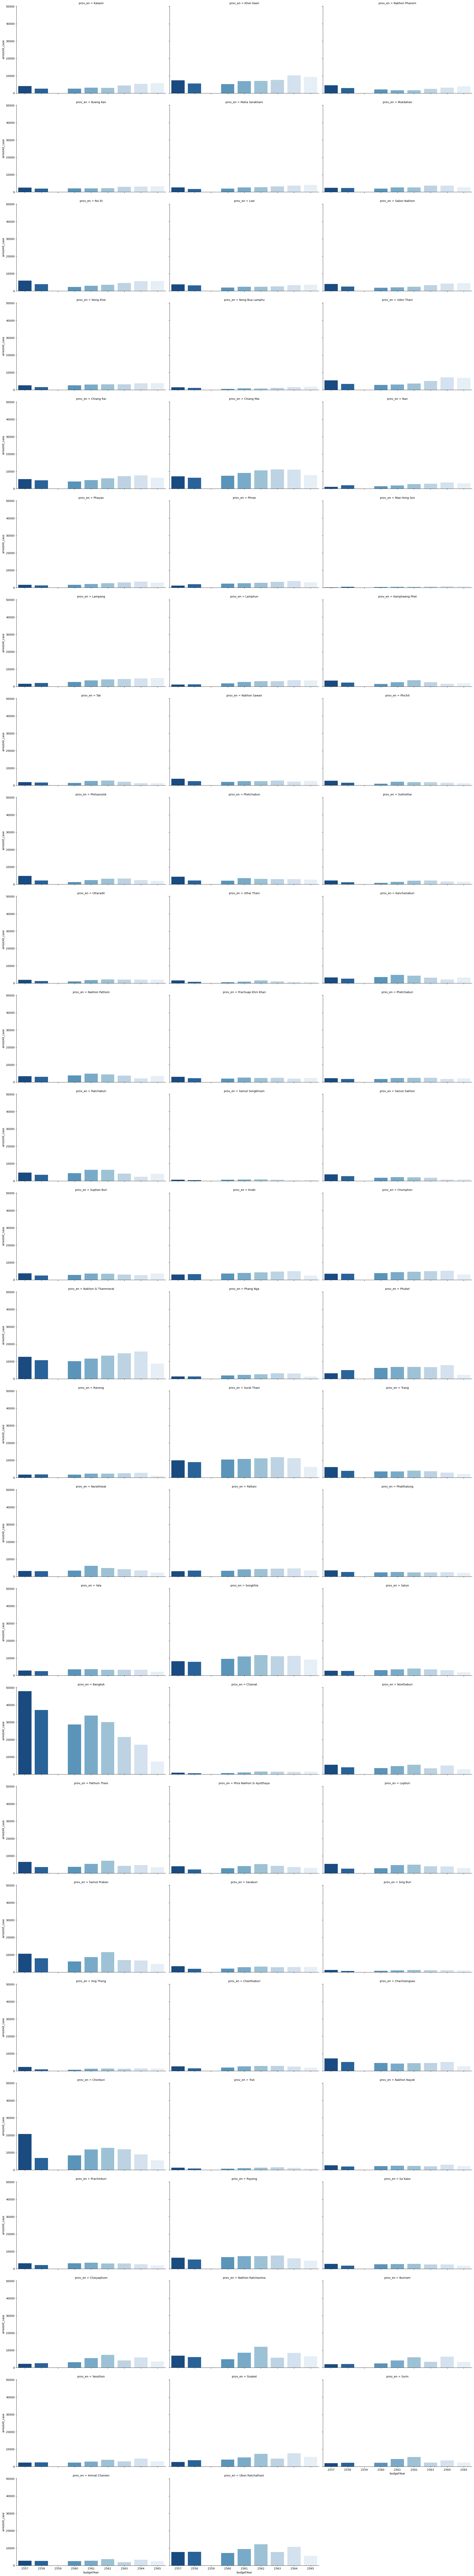

In [49]:
sns.catplot(
    data = tmp,
    # data=df,
    kind="bar",
    y="arrestAll_case",
    x="budgetYear",
    hue='budgetYear',
    # color=".7",
    col="prov_en",
    col_wrap=3,
    palette='Blues_r',
    height=5,
    aspect=1.6,
    sharex=True,
    errorbar=None
)

In [1]:
import pandas as pd


tmp2 = tmp[["budgetYear", "PROV_NAME", "arrestAll_case"]].copy()
tmp2["arrestAll_case"] = tmp2["arrestAll_case"].astype(int)
tmp2.info()
tmp2['rank'] = tmp2.groupby(["budgetYear"])['arrestAll_case'].rank(method='min', ascending = False).copy()
tmp3 = tmp2[["budgetYear", "PROV_NAME", "arrestAll_case", "rank"]].copy()
tmp3[tmp3["rank"] <= 3]


NameError: name 'tmp' is not defined

In [37]:
import pandas as pd

# Sample DataFrame
data = {
    'budgetYear': ["2022", "2022", "2023", "2023", "2023"],
    'PROV_ID': ['1', '1', '2', '2', '2'],
    'arrestAll_case': [100, 200, 150, 250, 180]
}
tmp2 = pd.DataFrame(data)
tmp2.info()
# Apply rank within each group
tmp2["rank"] = tmp2.groupby(["budgetYear"])["arrestAll_case"].rank(method="min")

tmp2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   budgetYear      5 non-null      object
 1   PROV_ID         5 non-null      object
 2   arrestAll_case  5 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 252.0+ bytes


,budgetYear,PROV_ID,arrestAll_case,rank
0,2022,1,100,1.0
1,2022,1,200,2.0
2,2023,2,150,1.0
3,2023,2,250,3.0
4,2023,2,180,2.0



---

### Population

> Try not to run though this section cells often. This process may take some time.

In [7]:

START_YEAR = 50
START_MONTH = 12
SLEEP_S = 2     # Gap between each requests, to prevent being blocked from website 

endpoint = "https://stat.bora.dopa.go.th/stat/statnew/connectSAPI/stat_forward.php?API=/api/statpophouse/v1/statpop/list?action=41"
headers = { "User-Agent": "Mozilla" }
params = {
    "yymmBegin": int(f"{START_YEAR}{str(START_MONTH).zfill(2)}"),
    "yymmEnd": int(f"{START_YEAR}{str(START_MONTH).zfill(2)}"),
    "statType": 0,
    "statSubType": 999,
    "subType": 99,
}

def set_params(params, year, month):
    params["yymmBegin"] = int(f"{year}{str(month).zfill(2)}")
    params["yymmEnd"] = int(f"{year}{str(month).zfill(2)}")
    return params


def get_data(endpoint, headers, params):
    response = requests.get(
        url = endpoint,
        headers = headers,
        params = params,
    )
    if response.ok:
        return pd.DataFrame(response.json())
    return None


if input("Do you want to run this cell? (Y/n): ").lower() == "y":
    df = get_data(endpoint, headers, params)
    print(f"[*] Initilizing '{START_YEAR}{START_MONTH}' dataframe ")
    for year in range(START_YEAR + 1, 68):
        # for month in range(1, 13):
            month = 12
            if year == 67 and month > 1:
                break
            else:
                params = set_params(params, year, month)
                df_append = get_data(endpoint, headers, params)
                if df_append is None:
                    print(f"[!] No data for '{year}{str(month).zfill(2)}'")
                else:
                    df = pd.concat([df, df_append])
                    print(f"[*] Appending '{year}{str(month).zfill(2)}' dataframe")
            time.sleep(SLEEP_S)
    print(f"[+] Finished!\n")
    df.to_csv("./data/thailand_population_by_prov_year.csv")
df.head()


[*] Initilizing '5012' dataframe 
[*] Appending '5112' dataframe
[*] Appending '5212' dataframe
[*] Appending '5312' dataframe
[*] Appending '5412' dataframe
[*] Appending '5512' dataframe
[*] Appending '5612' dataframe
[*] Appending '5712' dataframe
[*] Appending '5812' dataframe
[*] Appending '5912' dataframe
[*] Appending '6012' dataframe
[*] Appending '6112' dataframe
[*] Appending '6212' dataframe
[*] Appending '6312' dataframe
[*] Appending '6412' dataframe
[*] Appending '6512' dataframe
[*] Appending '6612' dataframe
[+] Finished!



,lstrLevel,lsregion,lscc,lsccDesc,lsrcode,lsrcodeDesc,lsaa,lsaaDesc,lstt,lsttDesc,lsmm,lsmmDesc,lsyymm,lssumtotMale,lssumtotFemale,lssumtotTot
0,0,0,10,กรุงเทพมหานคร,,,0,,0,,0,,5012,2727574,2988674,5716248
1,0,0,11,จังหวัดสมุทรปราการ,,,0,,0,,0,,5012,547341,579599,1126940
2,0,0,12,จังหวัดนนทบุรี,,,0,,0,,0,,5012,484838,539353,1024191
3,0,0,13,จังหวัดปทุมธานี,,,0,,0,,0,,5012,428791,468052,896843
4,0,0,14,จังหวัดพระนครศรีอยุธยา,,,0,,0,,0,,5012,367673,393039,760712


In [98]:
df.columns

Index(['lstrLevel', 'lsregion', 'lscc', 'lsccDesc', 'lsrcode', 'lsrcodeDesc',
       'lsaa', 'lsaaDesc', 'lstt', 'lsttDesc', 'lsmm', 'lsmmDesc', 'lsyymm',
       'lssumtotMale', 'lssumtotFemale', 'lssumtotTot'],
      dtype='object')

In [106]:
df_starter = df[["lsyymm", "lsccDesc", "lssumtotMale", "lssumtotFemale", "lssumtotTot"]].copy()
df_starter.reset_index(drop = True, inplace = True)
df_starter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   lsyymm          1078 non-null   int64 
 1   lsccDesc        1078 non-null   object
 2   lssumtotMale    1078 non-null   int64 
 3   lssumtotFemale  1078 non-null   int64 
 4   lssumtotTot     1078 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 42.2+ KB


In [107]:
df_starter["lsyymm"] = df_starter["lsyymm"].astype(str)
df_starter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   lsyymm          1078 non-null   object
 1   lsccDesc        1078 non-null   object
 2   lssumtotMale    1078 non-null   int64 
 3   lssumtotFemale  1078 non-null   int64 
 4   lssumtotTot     1078 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 42.2+ KB


In [108]:
df_starter = df_starter.assign(year=df_starter['lsyymm'].str[:2], month=df_starter['lsyymm'].str[2:]).copy()
df_starter.drop("lsyymm", axis = 1, inplace = True)
df_starter.head()

,lsccDesc,lssumtotMale,lssumtotFemale,lssumtotTot,year,month
0,กรุงเทพมหานคร,2590887,2934368,5525255,65,01
1,จังหวัดสมุทรปราการ,645772,710707,1356479,65,01
2,จังหวัดนนทบุรี,599520,689998,1289518,65,01
3,จังหวัดปทุมธานี,564232,626686,1190918,65,01
4,จังหวัดพระนครศรีอยุธยา,394039,426595,820634,65,01
